In [61]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re,string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import csv

In [62]:
Consumer_Key = "ee71LNIhBorkkXStapMD8Xf8a"
Consumer_Secret_Key = "CtimpCO2188bPm8Dx6j5eK43AbWJPnX8BJlIwO6irNJt1w2lmB"
Access_Token = "711763537971044353-ydboIEZFp6rvi7tT8Iqzx0odvr15ygt"
Access_Token_Secret = "YT5tehyL7rNqge2H992GAMHNEfWCcVBjf3J8UjrHq7SrC"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [74]:
csvFile = open('Uber.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "#Uber",count=2000, 
                          lang='en').items(2000):
    print(tweet.text)
    csvWriter.writerow([tweet.text])


In EP114 I discuss whether convenience is causing you to break your budget and leave you Uber broke. Can you relate… https://t.co/h0ddm5HGxU
@drcoderz Thanks Roman. Do you have information on some ball park figure the average volume of API request for an Uber trip? #UBER
RT @rv_vijaysingh: @Uber_Support is as useless as their drivers 👎🏻
@Uber_India you need to do something about it.
Shut your support if you…
@Uber_Support is as useless as their drivers 👎🏻
@Uber_India you need to do something about it.
Shut your support if… https://t.co/ISmBqAMBQh
RT @youknowcliff1: #Trump #whiteprivilege #capitol 
That is the #Uber driver asking "Where my money" #BlackLivesMatter #blacktwitter https:…
RT @youknowcliff1: #Trump #whiteprivilege #capitol 
That is the #Uber driver asking "Where my money" #BlackLivesMatter #blacktwitter https:…
Imagine what the surge rate is for an @Uber down in the DC area right now... #Uber, #Surge, #ThePurge, #TheSiege, #America, #PizzaNight.
Uber and Lyft ‘likely broke 

In [76]:
df = pd.read_csv("Uber.csv", header=None)
df

,0
0,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
1,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
2,RT @edigital247: 🤣🤣🤣🤣 infact kuku ki me o!!! #...
3,🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri ...
4,🤣🤣🤣🤣 infact kuku ki me o!!! #uber from Owerri ...
...,...
2019,Uber Eats avoids landmark ruling on workers’ s...
2020,I’m starting an #uber for horse-drawn carriage...
2021,RT @RuwanSubasinghe: #Uber settles employment ...
2022,12 days since @uber received my background che...


In [77]:

def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
    return teks
def hapus_emoji(teks):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',teks)
#     teks = to_kbbi(teks)
    

def hapus_tanda(teks): 
    tanda_baca = set(string.punctuation)
    tanda_baca.update(['…'])
    teks = ''.join(ch for ch in teks if ch not in tanda_baca)
    return teks

def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def kbbi(kata): # penyeragaman kata berdasarkan kbbi 
	#kbba = [kamus.strip('\n').strip('\r') for kamus in open('kamus\\kbba.txt')]
	kamus_kata = [kamus.strip('\n').strip('\r') for kamus in open('kbba.txt')]
	#ubah list menjadi dictionary 
	dic = {}
	for i in kamus_kata: 
		(key, val) = i.split('\t')
		dic[str(key)] = val
	#kbbi cocokan 
	final_string = ' '.join(str(dic.get(word, word)) for word in kata).split()
	return final_string

def to_kbbi(teks):
    tek = teks.split()
    tek = kbbi(tek)
    return tek

#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    return text

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)
    
    

# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopword_id.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 
# print('ada' in stop_w) # test periksa kata di dalam list stop_w

# def cleanText(teks):
#     teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
#     teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
#     teks = re.sub('RT[\s]+', '',teks)#hapus RT
#     teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
#     teks = teks.lower() #ubah jadi lower case
#     teks = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", teks)
#     import string
#     killpunctuation = str.maketrans('', '', string.punctuation)
#     return teks

#Apply function on review column
df[0] = df[0].apply(cleanText)

df

,0
0,🤣🤣 infact kuku ki me o uber from owerri to lag...
1,🤣🤣 infact kuku ki me o uber from owerri to lag...
2,🤣🤣 infact kuku ki me o uber from owerri to lag...
3,🤣🤣 infact kuku ki me o uber from owerri to lag...
4,🤣🤣 infact kuku ki me o uber from owerri to lag...
...,...
2019,uber eats avoids landmark ruling on workers’ s...
2020,i’m starting an uber for horsedrawn carriages ...
2021,ruwansubasinghe uber settles employment status...
2022,days since uber received my background check a...


In [78]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df[0].apply(getPolarity)
df['Subjectivity'] = df[0].apply(getSubjectivity)

df

,0,Polarity,Subjectivity
0,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000
1,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000
2,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000
3,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000
4,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000
...,...,...,...
2019,uber eats avoids landmark ruling on workers’ s...,0.000000,0.000000
2020,i’m starting an uber for horsedrawn carriages ...,-0.187500,0.300000
2021,ruwansubasinghe uber settles employment status...,-0.200000,0.300000
2022,days since uber received my background check a...,-0.250000,0.625000


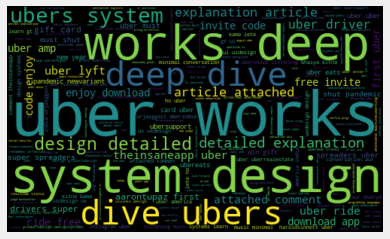

In [79]:
allWords =' '.join([twts for twts in df[0]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [80]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,0,Polarity,Subjectivity,Analysis
0,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000,Neutral
1,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000,Neutral
2,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000,Neutral
3,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000,Neutral
4,🤣🤣 infact kuku ki me o uber from owerri to lag...,0.000000,0.000000,Neutral
...,...,...,...,...
2019,uber eats avoids landmark ruling on workers’ s...,0.000000,0.000000,Neutral
2020,i’m starting an uber for horsedrawn carriages ...,-0.187500,0.300000,Negative
2021,ruwansubasinghe uber settles employment status...,-0.200000,0.300000,Negative
2022,days since uber received my background check a...,-0.250000,0.625000,Negative


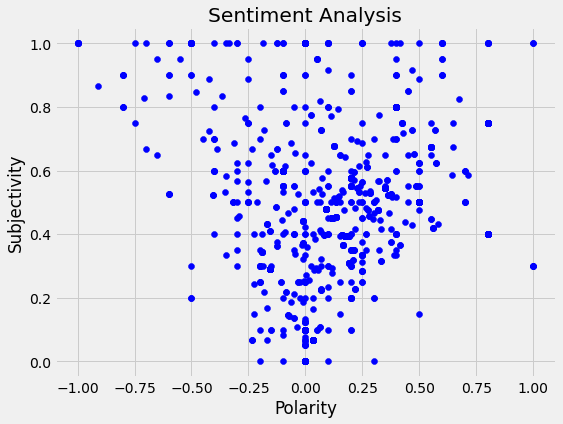

In [81]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [82]:
df['Analysis'].value_counts()

Positive    955
Neutral     732
Negative    337
Name: Analysis, dtype: int64

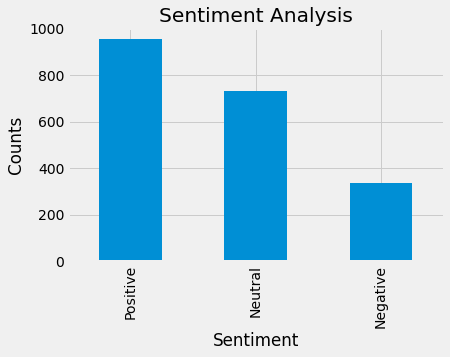

In [83]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()